In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import torch
from data_parser import data_loader_full
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [92]:
file_path = 'Predicted/results.pkl'
with open(file_path, 'rb') as pickle_file:
    pred = pickle.load(pickle_file)

In [93]:
data_occupancy_all, data_flow_all, data_speed_all = data_loader_full()
X_occu_all, y_occu_all = data_occupancy_all[:, :2], data_occupancy_all[:, 2]
X_occu_all, y_occu_all = torch.tensor(X_occu_all, dtype=torch.float32, requires_grad=True), torch.tensor(y_occu_all, dtype=torch.float32).unsqueeze(1)

In [94]:
pred_occu = pred['occupancy_recon'].to(torch.device('cpu'))
pred_flow = pred['flow_recon'].to(torch.device('cpu'))
pred_speed = pred['speed_recon'].to(torch.device('cpu'))

pred_k_t = pred['k_t'].to(torch.device('cpu'))

pred_k_x = pred['k_x'].to(torch.device('cpu'))
pred_q_x = pred['q_x'].to(torch.device('cpu'))
pred_v_x = pred['v_x'].to(torch.device('cpu'))
pred_k_t_predict = pred['k_t_predict'].to(torch.device('cpu'))

pred_k_xx = pred['k_xx'].to(torch.device('cpu'))
pred_q_xx = pred['q_xx'].to(torch.device('cpu'))
pred_v_xx = pred['v_xx'].to(torch.device('cpu'))

In [95]:
occupancy_recon = torch.cat((X_occu_all, pred_occu), dim=1).detach().numpy()
flow_recon = torch.cat((X_occu_all, pred_flow), dim=1).detach().numpy()
speed_recon = torch.cat((X_occu_all, pred_speed), dim=1).detach().numpy()

k_t = torch.cat((X_occu_all, pred_k_t), dim=1).detach().numpy()
k_x = torch.cat((X_occu_all,pred_k_x), dim=1).detach().numpy()
q_x = torch.cat((X_occu_all, pred_q_x), dim=1).detach().numpy()
v_x = torch.cat((X_occu_all, pred_v_x), dim=1).detach().numpy()

k_xx = torch.cat((X_occu_all,pred_k_xx), dim=1).detach().numpy()
q_xx = torch.cat((X_occu_all, pred_q_xx), dim=1).detach().numpy()
v_xx = torch.cat((X_occu_all, pred_v_xx), dim=1).detach().numpy()

k_t_predict = torch.cat((X_occu_all, pred_k_t_predict), dim=1).detach().numpy()

occupancy_recon = pd.DataFrame(occupancy_recon, columns = ['TimeStep','Station_Number','Occupancy'])
flow_recon = pd.DataFrame(flow_recon, columns = ['TimeStep','Station_Number','Flow'])
speed_recon = pd.DataFrame(speed_recon, columns = ['TimeStep','Station_Number','Speed'])

k_t = pd.DataFrame(k_t, columns = ['TimeStep','Station_Number','k_t'])

k_x = pd.DataFrame(k_x, columns = ['TimeStep', 'Station_Number', 'k_x'])
q_x = pd.DataFrame(q_x, columns = ['TimeStep', 'Station_Number', 'q_x'])
v_x = pd.DataFrame(v_x, columns = ['TimeStep', 'Station_Number', 'v_x'])

k_xx = pd.DataFrame(k_xx, columns = ['TimeStep', 'Station_Number', 'k_xx'])
q_xx = pd.DataFrame(q_xx, columns = ['TimeStep', 'Station_Number', 'q_xx'])
v_xx = pd.DataFrame(v_xx, columns = ['TimeStep', 'Station_Number', 'v_xx'])

k_t_predict = pd.DataFrame(k_t_predict, columns=['TimeStep', 'Station_Number', 'k_t'])

In [96]:
Flow = pd.read_csv('Data_Clean/Flow_all.csv',index_col='Station_PM')
Occupancy = pd.read_csv('Data_Clean/Occupancy_all.csv',index_col='Station_PM')
Speed = pd.read_csv('Data_Clean/Speed_all.csv',index_col='Station_PM')

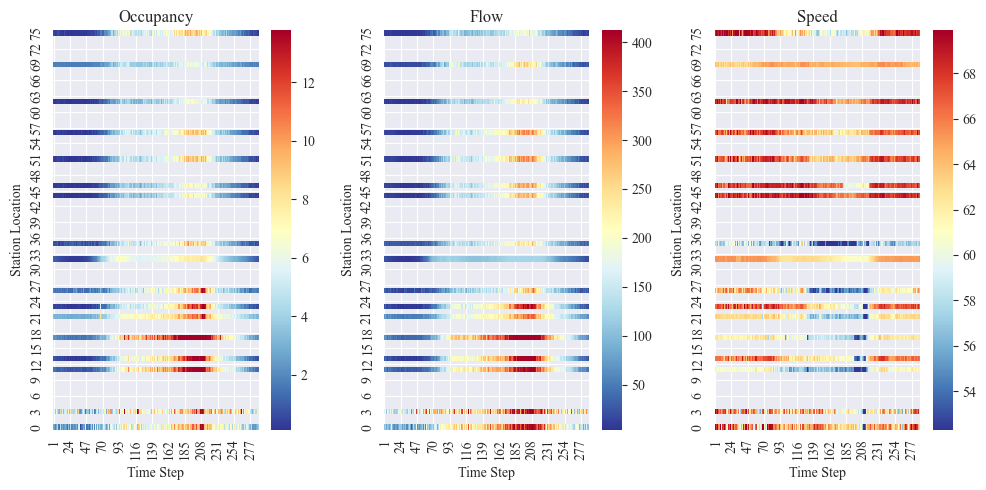

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# y_tick_positions = range(10, 288, 10)  # Adjust as needed
# y_tick_labels = [str(val) for val in y_tick_positions]

sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location')
axs[0].set_xlabel('Time Step')
axs[0].set_title("Occupancy")

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location')
axs[1].set_xlabel('Time Step')
axs[1].set_title("Flow")

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location')
axs[2].set_xlabel('Time Step')
axs[2].set_title("Speed")


plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap.png", dpi = 300)

In [109]:
Flow = pd.read_csv('Data_Clean/Flow.csv',index_col='Station_PM')
Occupancy = pd.read_csv('Data_Clean/Occupancy.csv',index_col='Station_PM')
Speed = pd.read_csv('Data_Clean/Speed.csv',index_col='Station_PM')

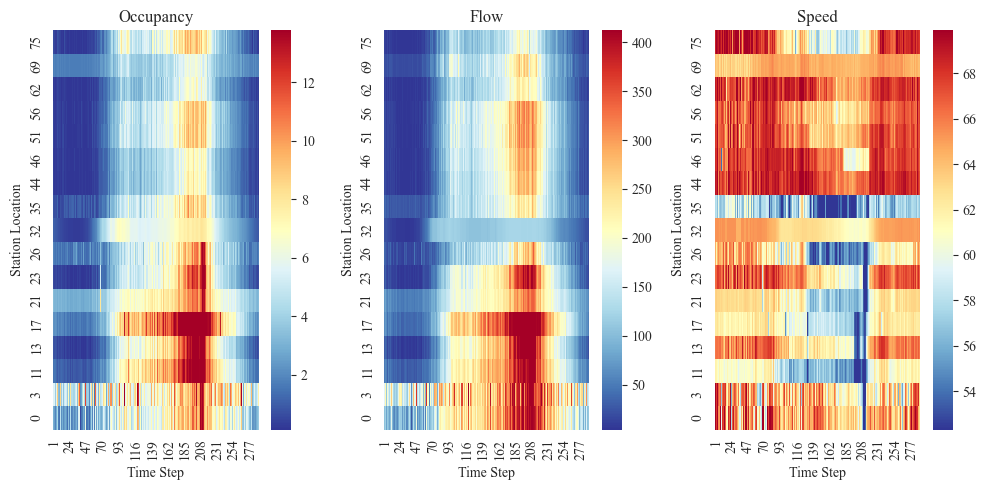

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# y_tick_positions = range(10, 288, 10)  # Adjust as needed
# y_tick_labels = [str(val) for val in y_tick_positions]

sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location')
axs[0].set_xlabel('Time Step')
axs[0].set_title("Occupancy")

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location')
axs[1].set_xlabel('Time Step')
axs[1].set_title("Flow")

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location')
axs[2].set_xlabel('Time Step')
axs[2].set_title("Speed")

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap_without.png", dpi = 300)

## Plot Reconstructed Data

In [98]:
occupancy_recon['TimeStep'] = occupancy_recon['TimeStep'].astype(int)
occupancy_recon['Station_Number'] = occupancy_recon['Station_Number'].astype(int)
flow_recon['TimeStep'] = flow_recon['TimeStep'].astype(int)
flow_recon['Station_Number'] = flow_recon['Station_Number'].astype(int)
speed_recon['TimeStep'] = speed_recon['TimeStep'].astype(int)
speed_recon['Station_Number'] = speed_recon['Station_Number'].astype(int)

In [99]:
occupancy_recon_wide = occupancy_recon.pivot(index='Station_Number', columns='TimeStep', values='Occupancy')
flow_recon_wide = flow_recon.pivot(index='Station_Number', columns='TimeStep', values='Flow')
speed_recon_wide = speed_recon.pivot(index='Station_Number', columns='TimeStep', values='Speed')

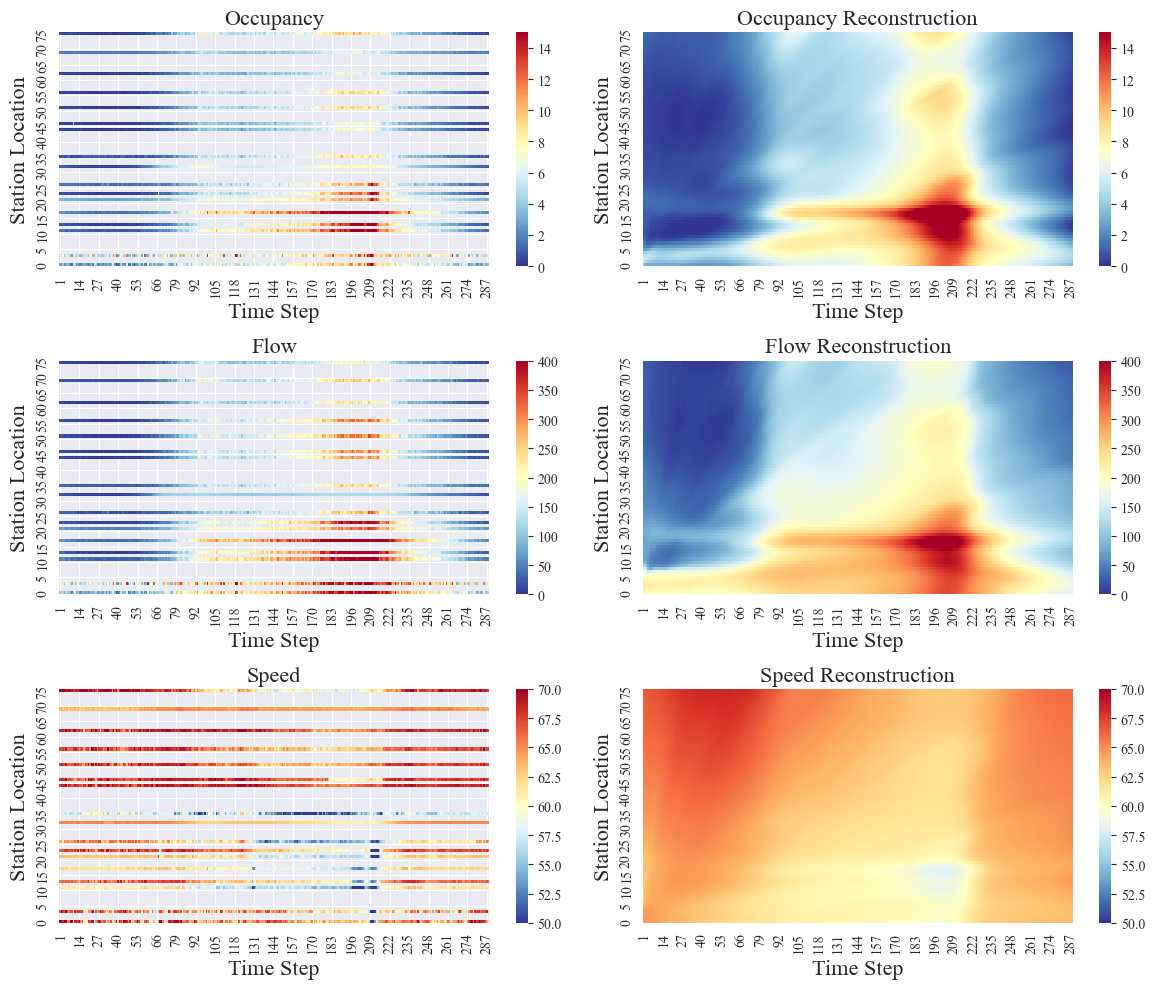

In [100]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

vmin1_occu, vmax1_occu = 0, 15

occu_heat_1 = sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,0])
axs[0,0].set_ylabel('Station Location', fontsize = 16)
axs[0,0].set_xlabel('Time Step',  fontsize = 16)
axs[0,0].set_title("Occupancy",  fontsize = 16)

occu_heat_2 = sns.heatmap(occupancy_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,1])
axs[0,1].set_ylabel('Station Location',  fontsize = 16)
axs[0,1].set_xlabel('Time Step',  fontsize = 16)
axs[0,1].set_title("Occupancy Reconstruction",  fontsize = 16)

vmin1_flow, vmax1_flow = 0, 400

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,0])
axs[1,0].set_ylabel('Station Location',  fontsize = 16)
axs[1,0].set_xlabel('Time Step',  fontsize = 16)
axs[1,0].set_title("Flow",  fontsize = 16)

sns.heatmap(flow_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,1])
axs[1,1].set_ylabel('Station Location',  fontsize = 16)
axs[1,1].set_xlabel('Time Step',  fontsize = 16)
axs[1,1].set_title("Flow Reconstruction",  fontsize = 16)

vmin1_speed, vmax1_speed = 50, 70

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,0])
axs[2,0].set_ylabel('Station Location',  fontsize = 16)
axs[2,0].set_xlabel('Time Step',  fontsize = 16)
axs[2,0].set_title("Speed",  fontsize = 16)

sns.heatmap(speed_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,1])
axs[2,1].set_ylabel('Station Location',  fontsize = 16)
axs[2,1].set_xlabel('Time Step',  fontsize = 16)
axs[2,1].set_title("Speed Reconstruction",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap_all.png", dpi = 300)

In [101]:
k_t['TimeStep'] = k_t['TimeStep'].astype(int)
k_t['Station_Number'] = k_t['Station_Number'].astype(int)

k_t_predict['TimeStep'] = k_t_predict['TimeStep'].astype(int)
k_t_predict['Station_Number'] = k_t_predict['Station_Number'].astype(int)

k_x['TimeStep'] = k_x['TimeStep'].astype(int)
k_x['Station_Number'] = k_x['Station_Number'].astype(int)

q_x['TimeStep'] = q_x['TimeStep'].astype(int)
q_x['Station_Number'] = q_x['Station_Number'].astype(int)

v_x['TimeStep'] = v_x['TimeStep'].astype(int)
v_x['Station_Number'] = v_x['Station_Number'].astype(int)

In [102]:
k_t_wide = k_t.pivot(index='Station_Number', columns='TimeStep', values='k_t')
k_t_predict_wide = k_t_predict.pivot(index='Station_Number', columns='TimeStep', values='k_t')

k_x_wide = k_x.pivot(index='Station_Number', columns='TimeStep', values='k_x')

q_x_wide = q_x.pivot(index='Station_Number', columns='TimeStep', values='q_x')

v_x_wide = v_x.pivot(index='Station_Number', columns='TimeStep', values='v_x')

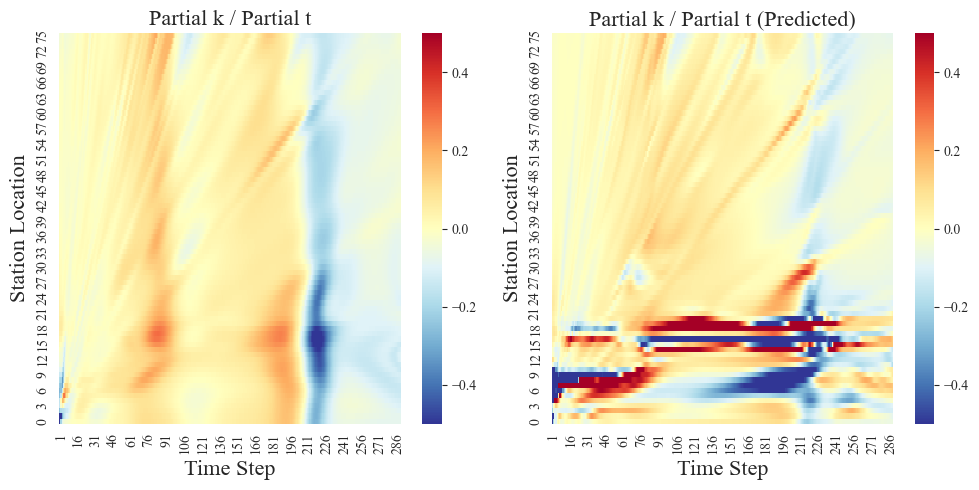

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

vmin, vmax = -0.5, 0.5
sns.heatmap(k_t_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin, vmax=vmax, annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial t",  fontsize = 16)

sns.heatmap(k_t_predict_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin, vmax=vmax, annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial k / Partial t (Predicted)",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/k_dev.png", dpi = 300)

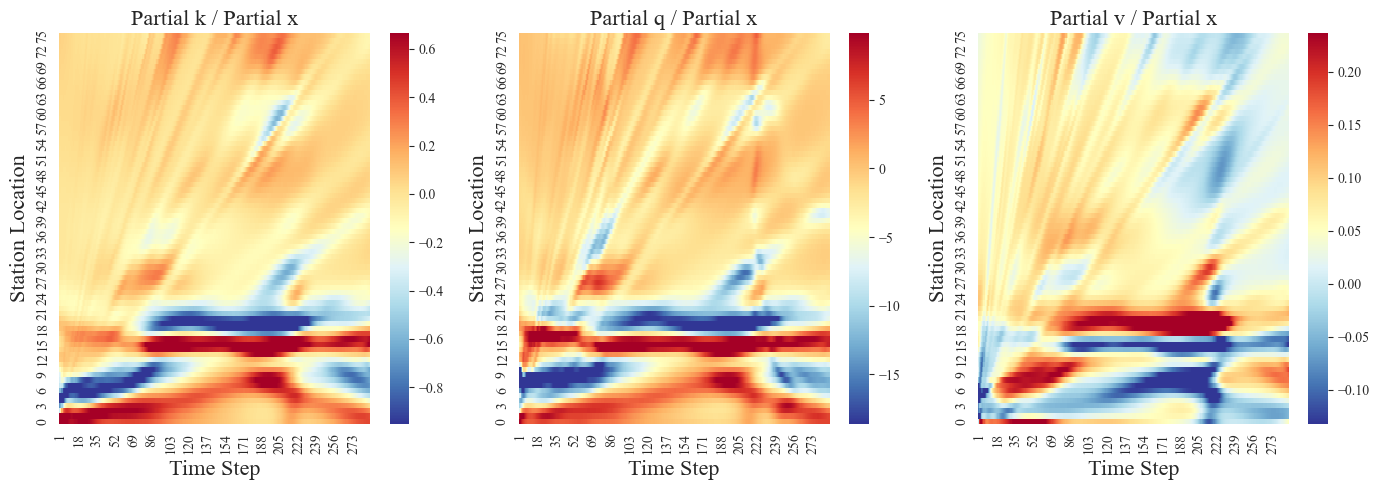

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(k_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial x",  fontsize = 16)

sns.heatmap(q_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial q / Partial x",  fontsize = 16)

sns.heatmap(v_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location',  fontsize = 16)
axs[2].set_xlabel('Time Step',  fontsize = 16)
axs[2].set_title("Partial v / Partial x",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/qv_dev.png", dpi = 300)

In [105]:
k_xx['TimeStep'] = k_xx['TimeStep'].astype(int)
k_xx['Station_Number'] = k_xx['Station_Number'].astype(int)

q_xx['TimeStep'] = q_xx['TimeStep'].astype(int)
q_xx['Station_Number'] = q_xx['Station_Number'].astype(int)

v_xx['TimeStep'] = v_xx['TimeStep'].astype(int)
v_xx['Station_Number'] = v_xx['Station_Number'].astype(int)

In [106]:
k_xx_wide = k_xx.pivot(index='Station_Number', columns='TimeStep', values='k_xx')

q_xx_wide = q_xx.pivot(index='Station_Number', columns='TimeStep', values='q_xx')

v_xx_wide = v_xx.pivot(index='Station_Number', columns='TimeStep', values='v_xx')

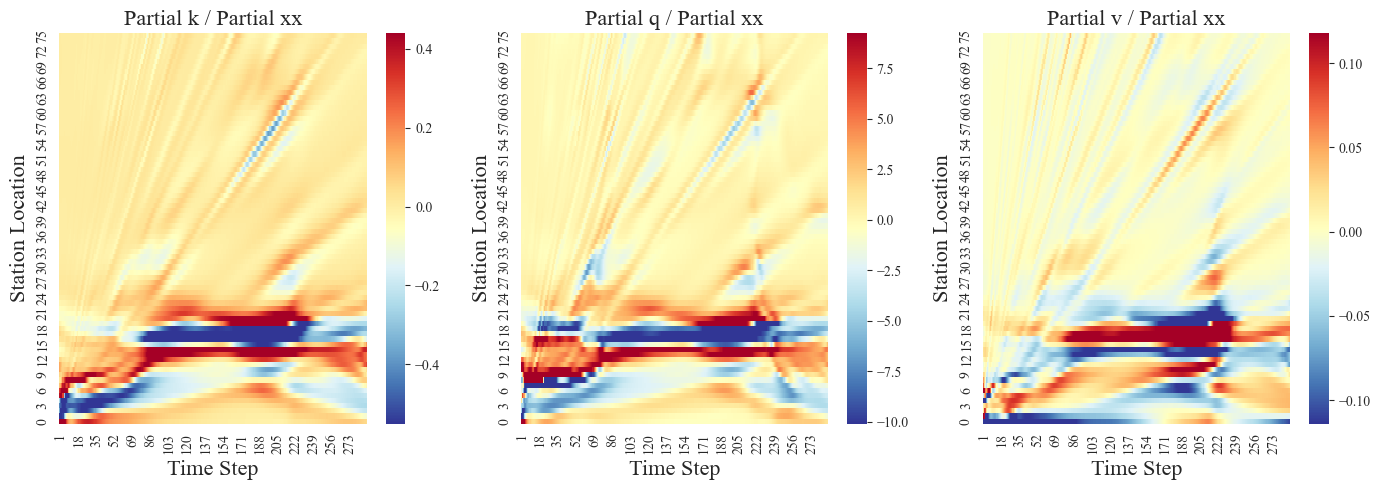

In [107]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(k_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial xx",  fontsize = 16)

sns.heatmap(q_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial q / Partial xx",  fontsize = 16)

sns.heatmap(v_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location',  fontsize = 16)
axs[2].set_xlabel('Time Step',  fontsize = 16)
axs[2].set_title("Partial v / Partial xx",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/qv_dev2.png", dpi = 300)

In [108]:
pred['coefficients']

tensor([[-0.0904],
        [-0.0000],
        [-0.0000],
        [-0.0000],
        [ 0.4595],
        [-0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1429],
        [ 0.0000],
        [ 0.0000],
        [-0.0000],
        [-0.0000],
        [-0.0000],
        [ 0.0080],
        [-0.0749],
        [ 0.0072],
        [ 0.1506],
        [-0.0000],
        [ 0.0000],
        [-0.0000],
        [ 0.0000],
        [ 0.0063],
        [-0.0000],
        [ 0.0000],
        [-0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0197],
        [-0.0000],
        [-0.0000],
        [ 0.0207],
        [-0.0407],
        [ 0.0244],
        [ 0.1474],
        [-0.5222],
        [ 0.1520],
        [-0.3812],
        [-0.0009],
        [-0.0726],
        [ 0.0131],
        [-0.0000],
        [ 0.1941],
        [-0.0339],
        [ 0.6347],
        [ 0.0815],
        [ 0.2306],
        [-0.4664],
        [ 0.1043],
        [-0.2385],
        [-0.